## Predictions : Tree based models

### working with the prediction pipeline for the tree based models only

In [1]:
#------------autoreloader
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [26]:
#---------------importing the src functions
from src.data.load_data import load_data, get_info, get_nan, get_shape, save_data
from src.models.split_data import data_split
from src.models.pred_plot_distance import plot_and_pred_train, best_model_pred, other_model_pred

In [4]:
#--------------df_train path
df_train_path = '../../data/preprocessed/distance/train.csv'
df_train_path

'../../data/preprocessed/distance/train.csv'

In [5]:
#--------------df_test path
df_test_path = '../../data/preprocessed/distance/test.csv'
df_test_path

'../../data/preprocessed/distance/test.csv'

In [6]:
#-------------loading and veryfying the both
df_train = load_data(df_train_path)
df_train.head()

,Source,Destination,Total_Stops,Price,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,2,2,0,0.027497,1,0,0,0,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.034483
1,1,1,2,0.075920,0,0,0,0,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.206897
2,0,0,2,0.155917,0,1,0,0,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.620690
3,1,1,1,0.057348,1,0,0,0,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.137931
4,2,2,1,0.148457,1,0,0,0,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.103448


In [7]:
df_test = load_data(df_test_path)
df_test.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,0,0,1,0,1,0,0,0.192308,1.000000,0.739130,0.545455,0.173913,0.454545,0.230769
1,1,1,1,1,0,0,0,0.423077,0.666667,0.260870,0.363636,0.434783,0.363636,0.076923
2,0,0,1,0,1,0,1,0.769231,0.666667,0.826087,0.272727,0.826087,0.000000,0.564103
3,0,0,1,0,0,1,0,0.769231,0.666667,0.347826,0.000000,0.913043,0.000000,0.307692
4,2,2,0,0,0,1,0,0.884615,1.000000,1.000000,1.000000,0.086957,0.818182,0.025641


In [8]:
#--------------null values in both
nan_values_train = get_nan(df_train)
nan_values_train

Source                       0
Destination                  0
Total_Stops                  0
Price                        0
Airline_IndiGo               0
Airline_Jet Airways          0
Airline_other                0
Additional_Info_Some info    0
Date_of_Journey_day          0
Date_of_Journey_month        0
Dep_Time_hour                0
Dep_Time_minute              0
Arrival_Time_hour            0
Arrival_Time_minute          0
Duration_in_hours            0
dtype: int64

In [9]:
nan_values_test = get_nan(df_test)
nan_values_test

Source                       0
Destination                  0
Total_Stops                  0
Airline_IndiGo               0
Airline_Jet Airways          0
Airline_other                0
Additional_Info_Some info    0
Date_of_Journey_day          0
Date_of_Journey_month        0
Dep_Time_hour                0
Dep_Time_minute              0
Arrival_Time_hour            0
Arrival_Time_minute          0
Duration_in_hours            0
dtype: int64

In [10]:
#-------------------splitting the data : train
X_train, X_test, y_train, y_test = data_split(df_train, price = 'Price')

In [11]:
#------------------veryfying through the shape
print(f"{X_train.shape} : {y_train.shape} : {X_test.shape} : {y_test.shape}")

(8012, 14) : (8012,) : (2671, 14) : (2671,)


In [12]:
#------------------splitting the data : test
X_eval = data_split(df_test, price = None)

In [13]:
#------------------veryfying it
X_eval.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,0,0,1,0,1,0,0,0.192308,1.000000,0.739130,0.545455,0.173913,0.454545,0.230769
1,1,1,1,1,0,0,0,0.423077,0.666667,0.260870,0.363636,0.434783,0.363636,0.076923
2,0,0,1,0,1,0,1,0.769231,0.666667,0.826087,0.272727,0.826087,0.000000,0.564103
3,0,0,1,0,0,1,0,0.769231,0.666667,0.347826,0.000000,0.913043,0.000000,0.307692
4,2,2,0,0,0,1,0,0.884615,1.000000,1.000000,1.000000,0.086957,0.818182,0.025641


In [14]:
#----------------X_train.head() for additional verification
X_train.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
752,0,0,1,1,0,0,0,1.000000,0.666667,0.695652,0.000000,0.913043,0.000000,0.137931
7431,4,4,0,0,0,1,0,0.192308,0.666667,0.347826,0.363636,0.434783,0.636364,0.034483
5478,1,1,1,0,1,0,0,0.423077,1.000000,0.782609,1.000000,0.826087,0.909091,0.793103
3445,0,0,1,0,1,0,0,0.192308,1.000000,0.478261,0.545455,0.173913,0.454545,0.517241
9380,2,2,0,0,1,0,0,0.653846,1.000000,0.304348,0.181818,0.434783,0.181818,0.068966


In [15]:
#------------------loading scaler_for_price
import joblib
scaler_path = '../../scalers/scaler_for_price.pkl'
scaler = joblib.load(scaler_path)

### --------------predictions and evaluations : train data first------------

In [16]:
#------------------1. Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_path_lr = '../../saved_models/distance/lr.pkl'

r2 score : 0.5573013997854898
MAE : 2029.5857354033667
RMSE : 3007.1864412879513
MSE : 9043170.292666094


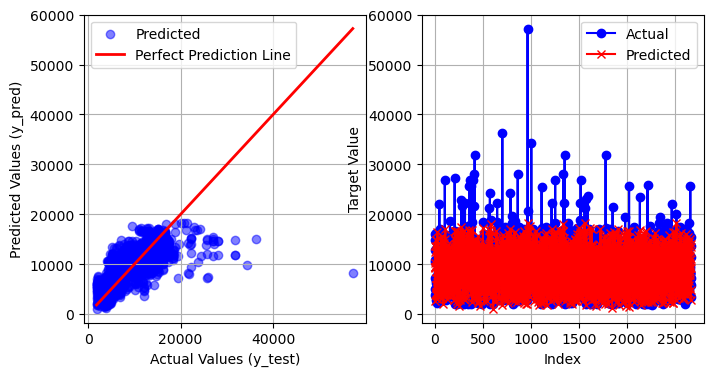

In [25]:
plot_and_pred_train(X_train, X_test, y_train, y_test, model = lr, model_path = model_path_lr, scaler = scaler)

In [27]:
#-----------------------2. SVR
from sklearn.svm import SVR
svr = SVR()

In [28]:
model_path_svr = '../../saved_models/distance/svr.pkl'
model_path_svr

'../../saved_models/distance/svr.pkl'

r2 score : 0.4177054849259211
MAE : 2701.9808183476607
RMSE : 3448.8763946837016
MSE : 11894748.385806449


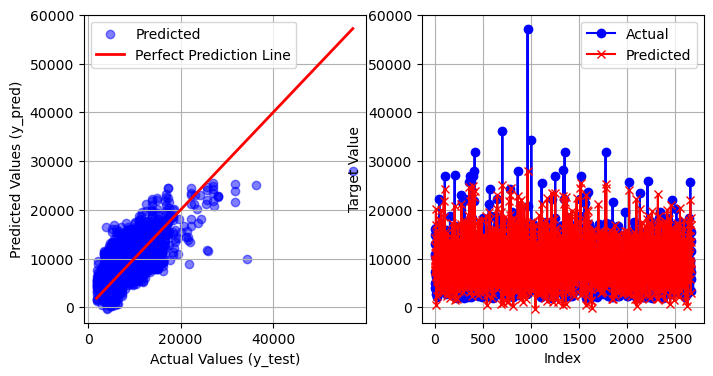

In [30]:
plot_and_pred_train(X_train, X_test, y_train, y_test, model = svr, model_path = model_path_svr, scaler = scaler)

In [31]:
#--------------------3. KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [33]:
model_path_knn = '../../saved_models/distance/knn.pkl'
model_path_knn

'../../saved_models/distance/knn.pkl'

r2 score : 0.7945512308985276
MAE : 1087.9027330587796
RMSE : 2048.604168137106
MSE : 4196779.037708724


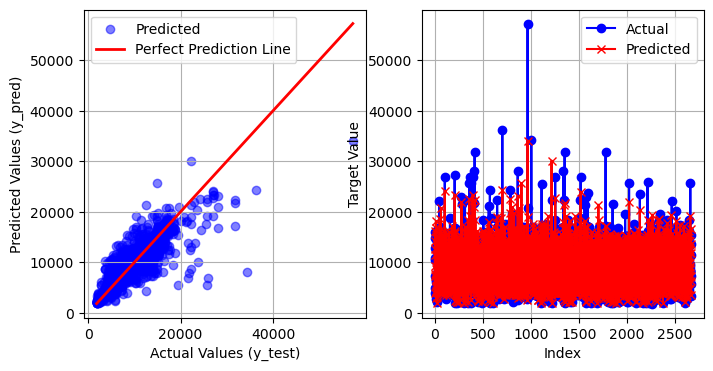

In [34]:
plot_and_pred_train(X_train, X_test, y_train, y_test, model = knn, model_path = model_path_knn, scaler = scaler)

### --------------predictions and eval : test data----------------

In [35]:
### for the eval data aka test data, I will pick the best model from above 3 and 
### then predict using it for the first time and then use it for the comparison

In [36]:
#-------------best model is KNN

In [37]:
#-------------predictions using the best model
y_pred_best = best_model_pred(X_eval, best_model_path = model_path_knn, scaler = scaler)

In [38]:
#---------veryfying them
y_pred_best

array([[14714. ],
       [ 7239. ],
       [11843.6],
       ...,
       [15827. ],
       [15028.8],
       [ 7962.8]])

##### ------------- comparison vs Random forest ----------------

r2 score : 0.6995130444014392
MAE : 1674.5490138118362
RMSE : 2273.795616982902
MSE : 5170146.507810656


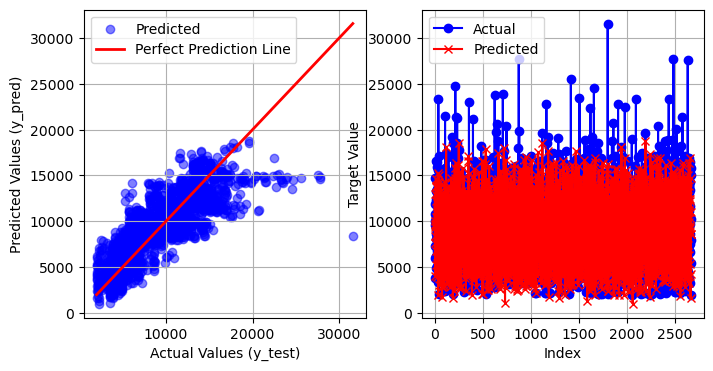

In [39]:
#-----------------1. Linear regression
other_model_pred(X_eval, y_pred_best, other_model_path = model_path_lr, scaler = scaler)

r2 score : 0.5012068897815952
MAE : 2331.5624903887533
RMSE : 2929.535979072588
MSE : 8582181.052680787


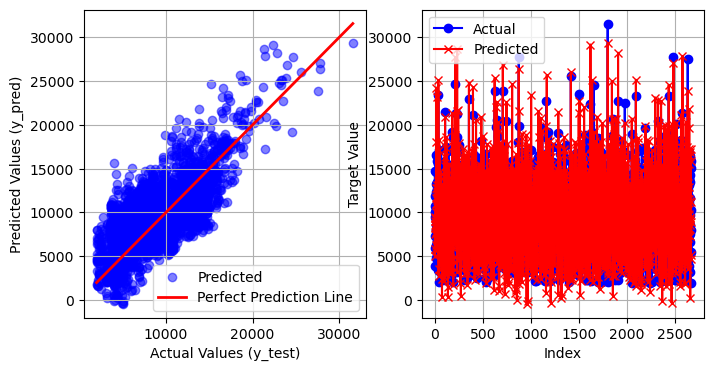

In [40]:
#----------------2. SVR
other_model_pred(X_eval, y_pred_best, other_model_path = model_path_svr, scaler = scaler)